In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
import data_loading as dl

In [3]:
RUN = ["3"]

rundata_numu, mc_weights_numu, data_pot_numu = dl.load_runs(
    RUN,
    data="opendata_bnb",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3


In [4]:
from microfit.histogram import Binning, RunHistGenerator, MultiChannelBinning
from microfit.run_plotter import RunHistPlotter

binning_def = ("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")

numu_binning_1 = Binning.from_config(*binning_def)
numu_binning_1.label = "NUMUCRT0P0PI"
numu_binning_1.set_selection(selection="NUMUCRT0P0PI", preselection="NUMU")

numu_binning_2 = Binning.from_config(*binning_def)
numu_binning_2.label = "NUMUCRTNP0PI"
numu_binning_2.set_selection(selection="NUMUCRTNP0PI", preselection="NUMU")

numu_binning = MultiChannelBinning([numu_binning_1, numu_binning_2])

numu_generator = RunHistGenerator(
    rundata_numu,
    numu_binning,
    data_pot=data_pot_numu,
    sideband_generator=None,
    uncertainty_defaults=None,
)
plotter_numu = RunHistPlotter(numu_generator, selection_title="numu selection")

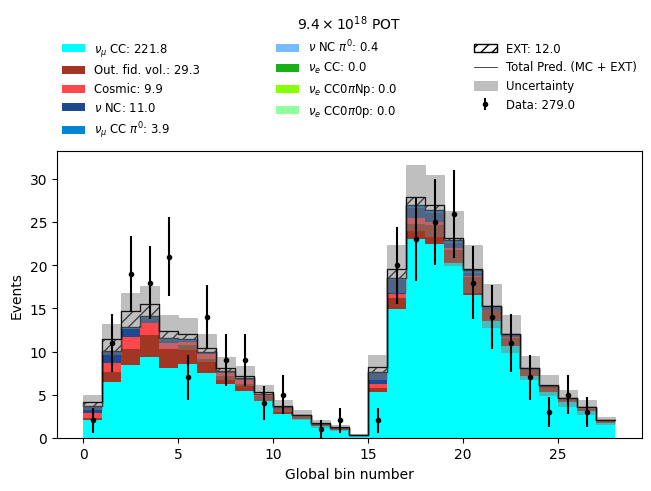

In [5]:
import matplotlib.pyplot as plt

ax = plotter_numu.plot(category_column="category", include_multisim_errors=True, add_ext_error_floor=False, stacked=True, show_total=True)

In [6]:
RUN = ["3"]
all_truth_filters = [
    "nue",
    "drt",
    # remove the ones below to save some time
    # "nc_pi0",
    # "cc_pi0",
    # "cc_nopi",
    # "cc_cpi",
    # "nc_nopi",
    # "nc_cpi",
]
rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=all_truth_filters,
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
Loading lee sample
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3


In [7]:
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
from microfit.histogram import MultiChannelBinning

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

binning_zpl_2shr = Binning.from_config(*binning_def)
binning_zpl_2shr.set_selection(preselection="ZPTwoShr", selection="ZPBDTTWOSHR")
binning_zpl_2shr.label = "ZPLOOSETWOSHR"

binning = MultiChannelBinning([binning_npl, binning_zpl])
binning

MultiChannelBinning(binnings=[Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='NPBDT', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query='nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1', selection_key='NPBDT', preselection_key='NP', selecti

In [8]:
from microfit.parameters import ParameterSet, Parameter
from microfit.signal_generators import SignalOverBackgroundGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),  # type: ignore
    ]
)

hist_generator = RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)
# blinding by hand
hist_generator.data_hist_generator = None
hist_generator.is_blinded = True

two_shr_hist_generator = RunHistGenerator(
    rundata,
    binning_zpl_2shr,
    data_pot=data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)

(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

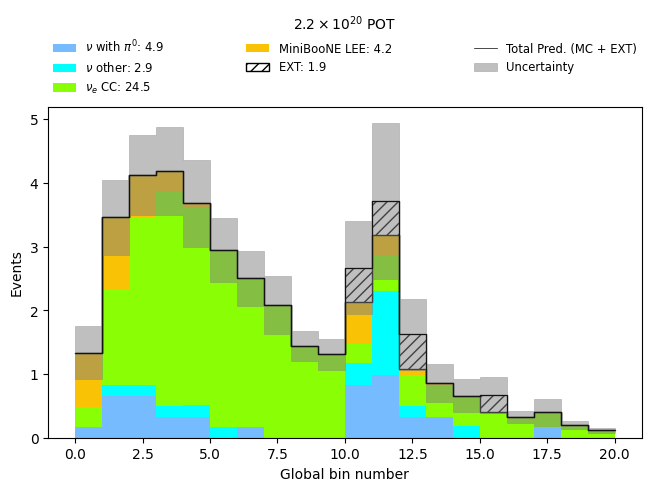

In [9]:
hist_generator.parameters["signal_strength"].value = 1.0

RunHistPlotter(hist_generator, selection_title="nue selection").plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    stacked=True,
    show_total=True,
)

(<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>, None)

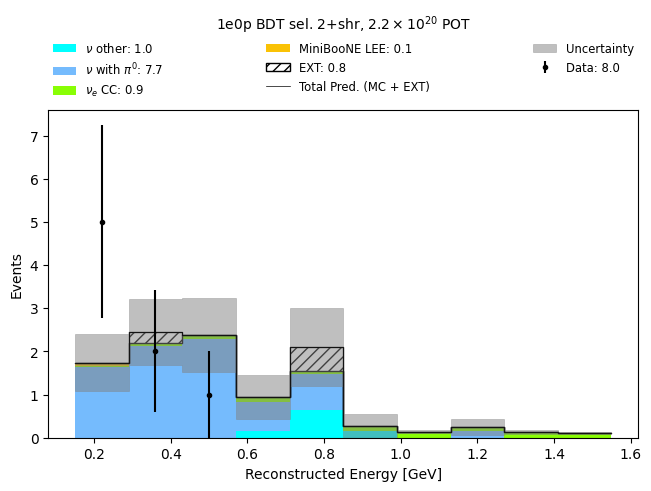

In [10]:
RunHistPlotter(two_shr_hist_generator, selection_title="nue selection").plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    stacked=True,
    show_total=True,
)

In [11]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[numu_generator, hist_generator, two_shr_hist_generator],
    constraint_channels=["NUMUCRT0P0PI", "NUMUCRTNP0PI", "ZPLOOSETWOSHR"],
    signal_channels=["ZPBDT", "NPBDT"],
)

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

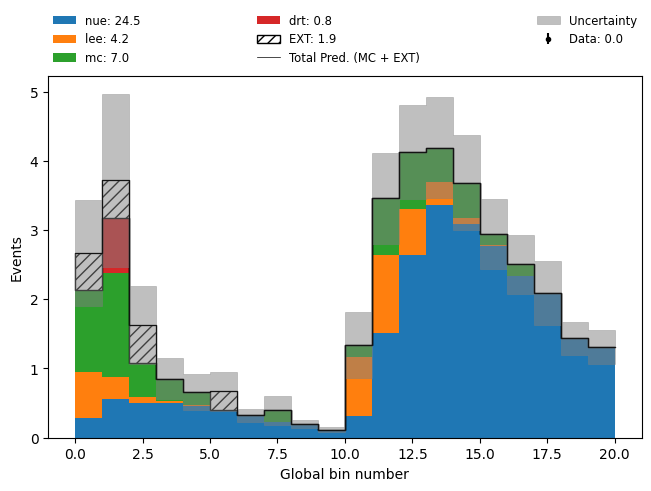

In [12]:
RunHistPlotter(analysis).plot(
    include_multisim_errors=True,
    add_ext_error_floor=False,
    stacked=True,
    show_total=True,
    # data_pot=analysis._get_pot_for_channel("NPBDT"),
    # channel="NPBDT",
)

In [13]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [14]:
analysis.channels

['NUMUCRT0P0PI', 'NUMUCRTNP0PI', 'NPBDT', 'ZPBDT', 'ZPLOOSETWOSHR']

(<Figure size 1600x500 with 2 Axes>,
 array([[<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>,
         <AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>]],
       dtype=object))

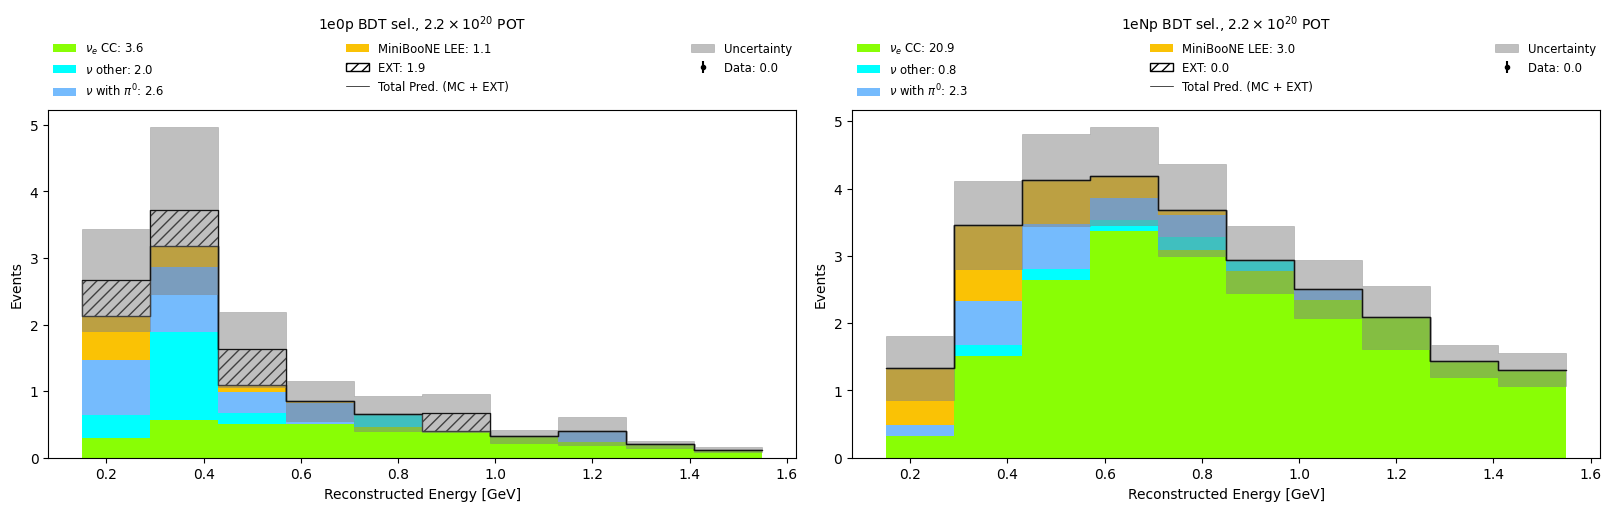

In [15]:
analysis.parameters["signal_strength"].value = 1.0
analysis.plot_signals(
    add_ext_error_floor=False, include_multisim_errors=True, stacked=True
)

(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Correlation matrix'}>)

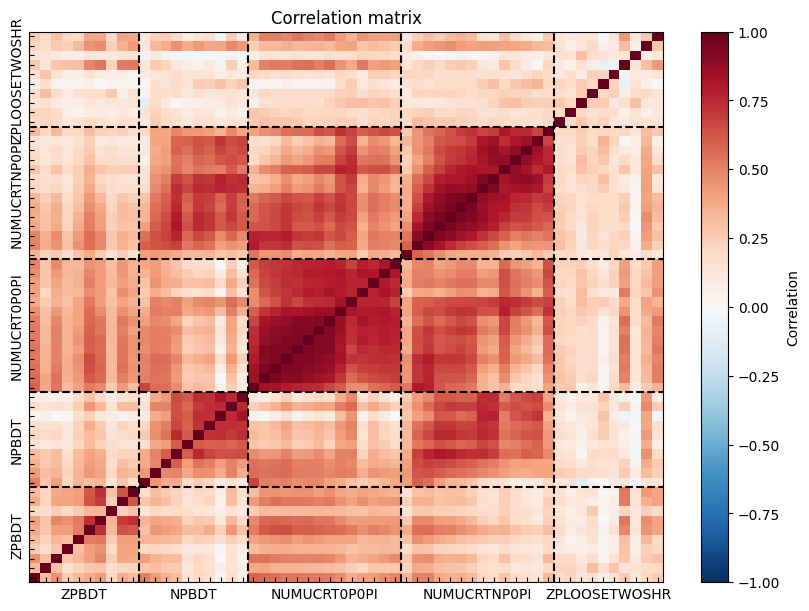

In [16]:
analysis.plot_correlation()

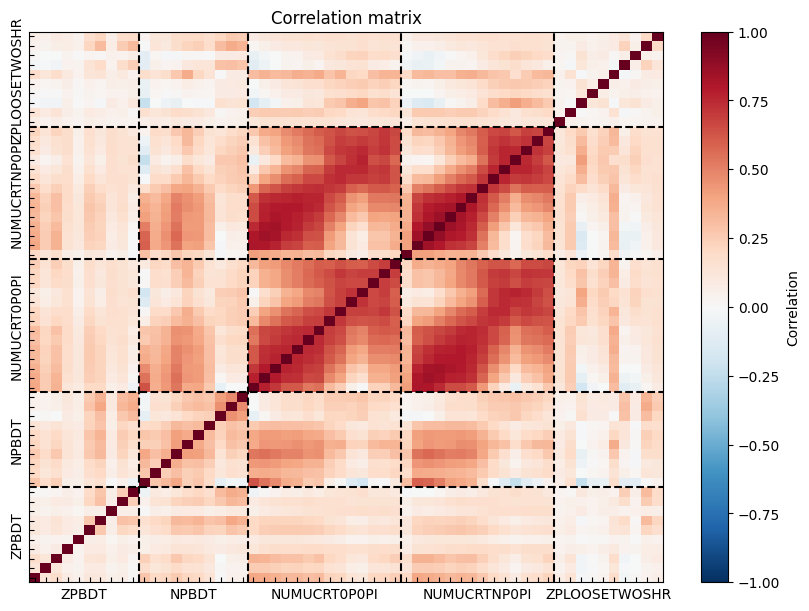

In [17]:
fig, ax = analysis.plot_correlation(
    ms_columns=["weightsFlux"],
    include_unisim_errors=False,
    as_correlation=True,
    # as_fractional=True,
    # vmin=0,
    # vmax=0.1,
    # cmap="Spectral_r"
)


In [18]:
mc_multiband_hist_no_constraint = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    use_sideband=False
)

mc_multiband_hist_constraint = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    use_sideband=True
)

../../microfit/histogram/histogram.py:365: RuntimeWarning: invalid value encountered in sqrt
  self.bin_counts = unumpy.uarray(self.nominal_values, np.sqrt(np.diag(value)))
/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


<AxesSubplot:title={'center':'Correlation matrix'}>

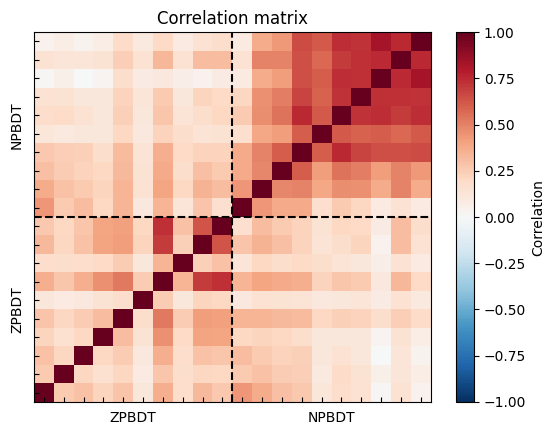

In [19]:
mc_multiband_hist_no_constraint.draw_covariance_matrix()

<AxesSubplot:title={'center':'Correlation matrix'}>

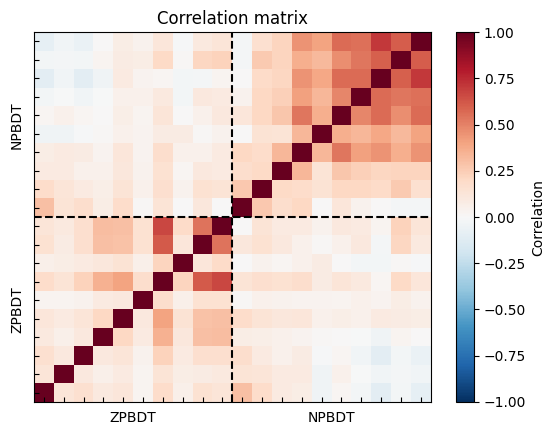

In [20]:
mc_multiband_hist_constraint.draw_covariance_matrix()

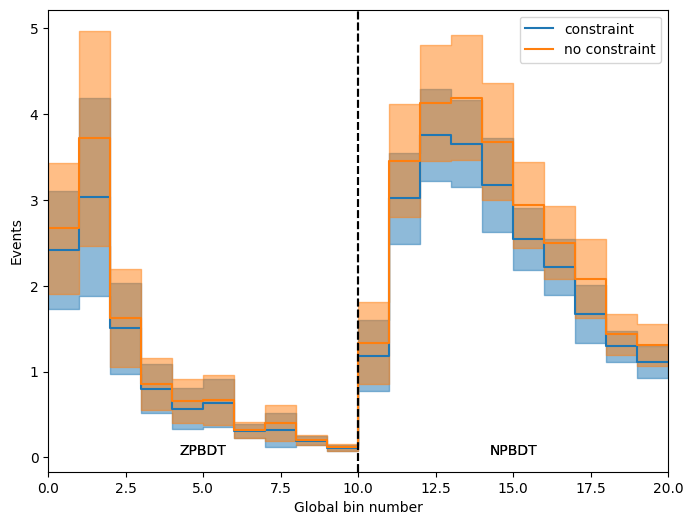

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
mc_multiband_hist_constraint[["ZPBDT", "NPBDT"]].draw(ax=ax, label="constraint")
mc_multiband_hist_no_constraint[["ZPBDT", "NPBDT"]].draw(ax=ax, label="no constraint")
ax.legend()
plt.show()

In [22]:
h1_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),  # type: ignore
    ]
)

h0_parameters = ParameterSet(
    [
        Parameter("signal_strength", 0.0, bounds=(0, 10)),  # type: ignore
    ]
)

results = analysis.two_hypothesis_test(
    h0_params=h0_parameters,
    h1_params=h1_parameters,
    sensitivity_only=True,
    n_trials=10000,
)

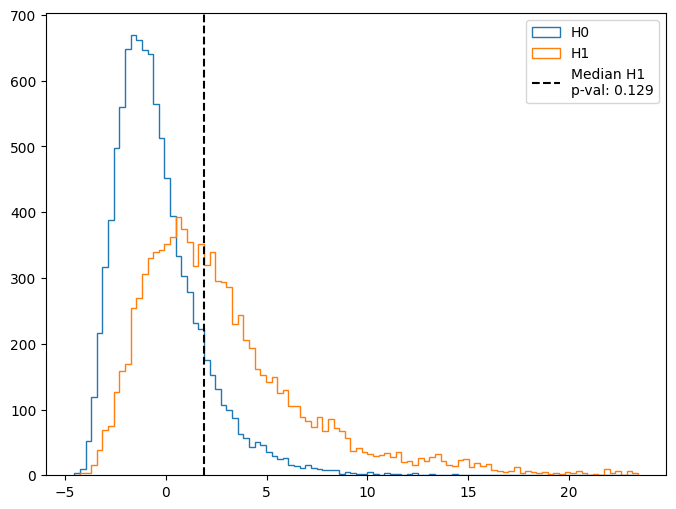

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
_, bin_edges, _ = plt.hist(results["samples_h0"], histtype="step", bins=100, label="H0")
plt.hist(results["samples_h1"], bins=bin_edges, histtype="step", label="H1")
plt.axvline(x=results["ts_median_h1"], color="k", linestyle="--", label=f"Median H1\np-val: {results['median_pval']:0.3f}")
plt.legend()